In [23]:
import matplotlib.pyplot as plt  
import scipy
from scipy.stats import norm
from collections import Counter
from ipywidgets import interactive, IntSlider
import random

In [11]:
def read_sequence(filename):
    with open(filename, "r") as file: 
        sequence = []
        file_content = file.readlines()
        for i in range(len(file_content)):
            if file_content[i].startswith("@"):
                sequence.append(file_content[i+1])
    
    return sequence

In [18]:
def kmer_frequency(sequence, length):
    output_dict = {}
    
    for line in sequence:
        # Save the kmer frequency for each sequence
        line_dict = {}
        used_counts = 0
        skipped_counts = 0
        
        if len(line) >= length:
            for i in range(0,len(line)-length+1):
                fragment = line[i:i+length]
                count = line.count(fragment)
                line_dict[fragment] = count
                
            # Add the kmer frequency in each sequence to the total dictionary 
            for key in line_dict:
                if key in output_dict.keys():
                    output_dict[key] += line_dict[key]
                else:
                    output_dict[key] = line_dict[key]
                
            used_counts += 1

        else:
            print("Warning: The kmer length is longer than nucleotide sequence")
            skipped_counts += 1

    return output_dict

In [16]:
def bar_interactive(length):
    sequence = read_sequence(filename)
    output = kmer_frequency(sequence,length)
    top10 = dict(Counter(output).most_common(10))
    
    #Plot the bar chart for top 10 values
    fig1 = plt.figure(figsize = (10,5))
    ax = fig1.add_subplot(1,1,1)
    ax.bar(list(top10.keys()), top10.values(), color = "b")
    ax.set_xlabel("Fragments",fontsize = 15)
    ax.set_ylabel("Counts",fontsize = 15)

In [19]:
%matplotlib inline
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF170YQV_rep2_1.fq'
sequence = read_sequence(filename)
length = 6

# create interactive sliders for kmer sequence
length_widget = IntSlider(min = 1, max = 1000, value = length)

# adjust settings to prevent continous recalculation and update of plot while user drags widget
for item in [ length_widget ]:
    item.continuous_update = False

interactive(bar_interactive, length = length_widget)

interactive(children=(IntSlider(value=6, continuous_update=False, description='length', max=1000, min=1), Outp…

In [8]:
%matplotlib inline
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF239CML_rep1_1.fq'
sequence = read_sequence(filename)
length = 6

# create interactive sliders for kmer sequence
length_widget = IntSlider(min = 1, max = 1000, value = length)

# adjust settings to prevent continous recalculation and update of plot while user drags widget
for item in [ length_widget ]:
    item.continuous_update = False

interactive(bar_interactive, length = length_widget)

interactive(children=(IntSlider(value=6, continuous_update=False, description='length', max=1000, min=1), Outp…

In [9]:
%matplotlib inline
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF239CML_rep1_2.fq'
sequence = read_sequence(filename)
length = 6

# create interactive sliders for kmer sequence
length_widget = IntSlider(min = 1, max = 1000, value = length)

# adjust settings to prevent continous recalculation and update of plot while user drags widget
for item in [ length_widget ]:
    item.continuous_update = False

interactive(bar_interactive, length = length_widget)

interactive(children=(IntSlider(value=6, continuous_update=False, description='length', max=1000, min=1), Outp…

In [33]:
%matplotlib inline
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF170YQV_rep2_2.fq'
sequence = read_sequence(filename)
length = 6
output_dict = kmer_frequency(sequence,length)
print(output_dict['GGGAGG'])
# create interactive sliders for kmer sequence
length_widget = IntSlider(min = 1, max = 1000, value = length)

# adjust settings to prevent continous recalculation and update of plot while user drags widget
for item in [ length_widget ]:
    item.continuous_update = False

interactive(bar_interactive, length = length_widget)

370811


interactive(children=(IntSlider(value=6, continuous_update=False, description='length', max=1000, min=1), Outp…

In [25]:
def shuffled_sequence(sequence, kmer_sequence):
    random.seed(100)
    kmer_counts = []
    
    for i in range(0,100):
        count = 0

        for line in sequence:
            shuffled_line = ''.join(random.sample(line,len(line)))

            if len(line) >= length:
                for i in range(0,len(shuffled_line)-length+1):
                    count += shuffled_line.count(kmer_sequence)

            else:
                print("Warning: The kmer length is longer than nucleotide sequence")

        kmer_counts.append(count)
    print(kmer_counts)
    return kmer_counts


In [ ]:
# Generate the counts for the choosen kmer sequence
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF170YQV_rep2_2.fq'
sequence = read_sequence(filename)
kmer_sequence = "GGGAGG"
length = 6
kmer_counts = shuffled_sequence(sequence, kmer_sequence)

# Plot the histogram
fig2 = plt.figure(figsize = (10,5))
ax1 = fig2.add_subplot(1,1,1)

_, bins, _ = ax1.hist(kmer_counts,bins = 100, density=1, alpha=0.5,label = "bins")

ax1.set_xlabel("counts for " + kmer_sequence, fontsize = 15)
ax1.set_ylabel("Proportion", fontsize = 15)
ax1.set_title(f"Mean = {mu:.2f}, SD = {sigma:.2f}",fontsize = 20)

In [ ]:
# Generate the counts for the choosen kmer sequence
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF170YQV_rep2_2.fq'
sequence = read_sequence(filename)
kmer_sequence = "GGGAGG"
length = 6
kmer_counts = shuffled_sequence(sequence, kmer_sequence)

In [36]:
kmer_counts = [157794, 158375, 158745, 158508, 157856, 159387, 158277, 158693, 158840, 158336, 158911, 158514, 159032, 158485, 158863, 158361, 157993, 158018, 158471, 158289, 158157, 158316, 157982, 158852, 158327, 158263, 158294, 157716, 158650, 159102, 158091, 158760, 158568, 158008, 158311, 158455, 158380, 158121, 158152, 158647, 158654, 158538, 158982, 158563, 158300, 158519, 158807, 158227, 158779, 158509, 158527, 159230, 157870, 158588, 159090, 158420, 158713, 158744, 159220, 158623, 157781, 158842, 158457, 158740, 158710, 158219, 158253, 158139, 158561, 158589, 157971, 158469, 158623, 158239, 158594, 158135, 158407, 157824, 158857, 158297, 158577, 158738, 158645, 158628, 158213, 157864, 158691, 158725, 158629, 158757, 158430, 158713, 158549, 158978, 158646, 158271, 158332, 158675, 158122, 158602]

Text(0.5, 1.0, 'Mean = 158482.95, SD = 340.14')

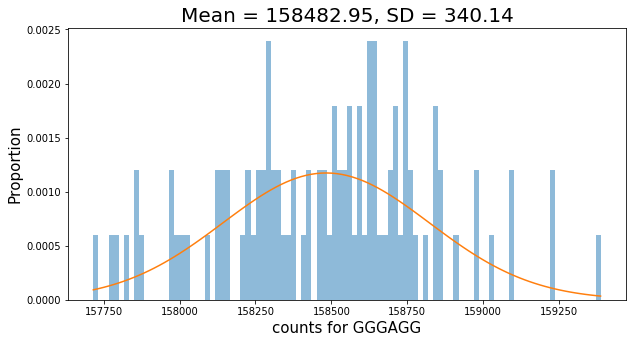

In [39]:
# Plot the histogram
fig2 = plt.figure(figsize = (10,5))
ax1 = fig2.add_subplot(1,1,1)

_, bins, _ = ax1.hist(kmer_counts, bins = 100, density=1, alpha=0.5,label = "bins")

mu, sigma = scipy.stats.norm.fit(list(kmer_counts))
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
ax1.plot(bins, best_fit_line, label = 'trendline')
ax1.set_xlabel("counts for GGGAGG", fontsize = 15)
ax1.set_ylabel("Proportion", fontsize = 15)
ax1.set_title(f"Mean = {mu:.2f}, SD = {sigma:.2f}",fontsize = 20)